# BMEG 400Q-591Q : Lab A


---
### Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



The dataset is available at the following link: [Dataset Link](https://drive.google.com/drive/folders/1OqOCUgEXKyadnhC10tbh8Jb1c6g0YgXW?usp=drive_link).
you can create a shortcut in your Google Drive, then you can find it in '/content/drive'

----

## **Part A: Segmentation with X-ray and CT Scans**

In this part of the assignment, you will explore the differences between using **X-ray** and **CT scans** for lung segmentation by applying **thresholding** technique.

---
##### Why is Lung Segmentation Important?

In medical imaging, **segmentation** is a crucial preprocessing step that involves identifying and isolating regions of interest (ROIs) within images. In the context of **lung imaging**, segmentation plays a vital role for several reasons:

1. **Disease Detection and Diagnosis**:  
   - Helps detect abnormalities such as **tumors**, **nodules**, and **lung infections** (e.g., COVID-19 or pneumonia).
   - Differentiates between healthy and affected lung regions, aiding in early diagnosis.

2. **Treatment Planning and Monitoring**:  
   - Lung segmentation provides accurate volume measurements, which are essential for **monitoring disease progression** or **treatment response** (e.g., tumor shrinkage during therapy).

3. **Quantitative Analysis**:  
   - Enables automatic calculation of lung metrics, such as **volume**, **air trapping**, and **lesion load**, which are crucial in respiratory diseases like **chronic obstructive pulmonary disease (COPD)**.

4. **Radiotherapy and Surgery Planning**:  
   - Lung segmentation ensures that only diseased areas are targeted, minimizing damage to healthy lung tissue.

---

### **Segmenting the Lung from an X-ray scan**



Importing Libraries

In [ ]:
import os
import imageio
import matplotlib.pyplot as plt
import numpy as np

Load and visualize an Image


In [ ]:
xray_image = imageio.v3.imread("/content/drive/MyDrive/Data/Xray/00000011_001.png")
print(xray_image.shape)
print(xray_image.dtype)


plt.imshow(xray_image, cmap="gray")
plt.axis("off")
plt.show()


**Write a Python code to segment an X-ray image using a threshold and visualize the resulting binary segmentation mask.**

In [ ]:
#TO DO

---
### Discussion
Comment on the previous results <br> <br>
<font color="#008000">Answer :</font>


***

### **Segmenting the Lung from a CT scan**


Installing Libraries

In [ ]:
!pip install nilearn

Importing Libraries

In [ ]:

import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
from PIL import Image, ImageDraw
from scipy.spatial import ConvexHull
from skimage import measure
from matplotlib.animation import FuncAnimation
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import re
from nilearn import plotting, image

%matplotlib inline


Write a Python code to read nfti volumes using [Nibabel](https://nipy.org/nibabel/gettingstarted.html) Library, then load 'Data/CT/coronacases_org_001.nii'

In [ ]:
#TO DO


Write a Python code to visualize the 3D volume using [Nilearn](https://nilearn.github.io/stable/modules/generated/nilearn.plotting.view_img.html)

In [ ]:
# TO DO

Write a Python code to extract the [header](https://nipy.org/nibabel/nifti_images.html) file information

In [ ]:
#TO DO

---

<br> **Q1: What is the shape of the data in this NIfTI file? What does each dimension represent?** <br><br>
<font color="#008000">Answer:</font>  


<br> **Q2: What do the pixel dimensions mean, and how are they represented in this NIfTI header?** <br><br>
<font color="#008000">Answer:</font>  



<br> **Q3: What is the affine?** <br><br>
<font color="#008000">Answer:</font>  

---

Animation of 3D Volume Slices

In [ ]:
def plot_ct_animation(ct_numpy, interval=100):
    """Plots the CT scan slices as an animation."""
    num_slices = ct_numpy.shape[2]  # Z-axis slices

    # Initialize the plot
    fig, ax = plt.subplots()
    img = ax.imshow(ct_numpy[:, :, 0], cmap='gray', vmin=np.min(ct_numpy), vmax=np.max(ct_numpy))
    ax.axis('off')  # Hide axes for better visualization

    def update(frame):
        """Updates the image to the current frame."""
        img.set_data(ct_numpy[:, :, frame])
        ax.set_title(f"Slice {frame + 1}/{num_slices}")
        return img,

    # Create animation and loop back to start after last frame
    ani = FuncAnimation(fig, update, frames=num_slices, interval=interval, blit=True, repeat=True)

    # Display the animation in Jupyter Notebook
    from IPython.display import HTML
    plt.close(fig)  # Close the static figure to avoid double display
    return HTML(ani.to_jshtml())


Rotate the image for easier visualization and generate the animated GIF

In [ ]:
#TO DO

Load the Ground Truth Lung Mask located in 'Data/CT/coronacases_001.nii'

In [ ]:
#TO DO

Create 3D Animation for the Mask

In [ ]:
#TO DO

For Simplicity, we will slice the volume and work with a 2D Slice only, choose any slice 

In [ ]:
#TO DO

Overlay a segmentation mask on the original image

In [ ]:
def overlay_mask(ct_numpy, mask, color=(1, 0, 0), alpha=0.05):
    """
    Overlay a binary mask on the CT scan image with a specified color.

    Parameters:
    - ct_numpy: 2D numpy array representing the grayscale CT scan.
    - mask: 2D numpy array representing the binary mask (same shape as ct_numpy).
    - color: Tuple of 3 floats (R, G, B) representing the color to use for the mask (default is red).
    - alpha: float, transparency factor for the overlay (default 0.4).

    Returns:
    - overlay_image: 3D numpy array representing the image with the mask overlaid in the specified color.
    """
    # Transpose the inputs



    # Normalize CT image to [0, 1] range if it's not already
    ct_normalized = (ct_numpy - ct_numpy.min()) / (ct_numpy.max() - ct_numpy.min())

    # Create an RGB version of the CT scan
    ct_rgb = np.stack([ct_normalized] * 3, axis=-1)  # Convert grayscale to RGB

    # Create an RGB mask in the specified color
    mask_rgb = np.zeros_like(ct_rgb)
    for i in range(3):  # Apply the color to the mask
        mask_rgb[:, :, i] = mask * color[i]

    # Overlay the mask on the CT scan
    overlay_image = (1 - alpha) * ct_rgb + alpha * mask_rgb
    plt.figure()
    plt.imshow(overlay_image, cmap="gray")
    plt.axis('off')


In [ ]:
#TO DO

---

#### **Understanding CT Windowing and Hounsfield Units (HU)**

In **Computed Tomography (CT)** imaging, different tissues are visualized based on their **Hounsfield Units (HU)**, which represent the tissue's density relative to water. This scale helps differentiate between various body tissues in CT images, with air, fat, water, soft tissues, and bones all having distinct HU values. However, to display this range effectively, we use a technique called **windowing**.

---

 **What are Hounsfield Units (HU)?**

Hounsfield Units are a quantitative scale for describing radiodensity:

- **Air:** -1000 HU (black)  
- **Lungs:** Around -500 HU  
- **Fat:** Between -200 and -100 HU  
- **Water:** 0 HU (reference point)  
- **Soft Tissue:** 30 to 45 HU  
- **Bone:** > 500 HU  
- **Cortical Bone:** Around 1000 HU (white)

The range from -1000 to 1000 HU represents the radiodensity spectrum that a CT scanner can detect.

---

#### **The Concept of CT Windowing**

CT images have a large range of Hounsfield Unit values. However, a computer display is limited in the range of intensities it can show. If all the HU values are mapped directly to grayscale, subtle differences in tissues could be lost. To address this, **windowing** is applied to focus on a specific range of HU values that are most relevant for diagnosis.

---

#### **Window Width (W) and Window Level (L)**

- **Window Width (W):**  
  This is the range of Hounsfield Units that will be mapped to grayscale values.  
  - A **narrow window width** (e.g., 50 HU) highlights subtle differences, such as soft tissues.
  - A **wide window width** (e.g., 500 HU) includes a larger range, suitable for bone imaging.

- **Window Level (L):**  
  This is the midpoint of the window width, centered on a specific HU value.  
  - **Setting the window level around 0 HU** focuses on water and soft tissues.
  - **Higher window levels** (e.g., 300 HU) are better for bone or calcified tissues.
  - **Lower window levels** (e.g., -500 HU) highlight air-filled structures like the lungs.

---

#### **Why Windowing is Important?**

- **Soft Tissue Window** (W = 300, L = 50): Enhances visibility of organs like the liver or brain.
- **Lung Window** (W = 1500, L = -500): Optimizes visualization of lung structures and air-filled spaces.
- **Bone Window** (W = 2000, L = 500): Makes bones and calcified regions more distinct.

---



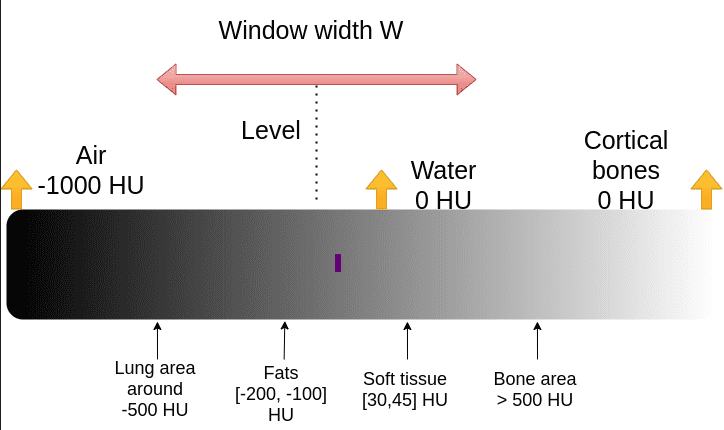

Plotting Function

In [ ]:

def show_slice(slice):
    """
    Function to display an image slice
    Input is a numpy 2D array
    """
    plt.figure()
    plt.imshow(slice, cmap="gray")
    plt.axis('off')





Write a Python function to apply windowing on a CT slice.
hint: you can use  [np.clip](https://numpy.org/doc/2.1/reference/generated/numpy.clip.html)

In [ ]:
#TO DO


Visualize Original Image

In [ ]:
#TO DO


Visualizing different windows of the Image

In [ ]:
#TO DO


In [ ]:
#TO DO


# Lung Segmentation from CT Images - Explanation of the Logic

The lung segmentation task involves several stages, each building upon the previous to create a full pipeline for identifying and isolating lung regions from CT images. Below is a detailed explanation of the workflow:

## 1. Intensity-Based Segmentation  
- First, we focus on segmenting the CT image based on intensity values that correspond to the lung region.
- The process involves clipping the image values to a specific range (`min_val` and `max_val`) to isolate regions of interest.
- The clipped image is then converted into a binary image, where pixel values are either 0 or 1, based on their intensity.

## 2. Contour Detection  
- Using the binary image, we detect contours, which represent the boundaries of segmented regions.
- Contours are essential for identifying specific structures, such as the lungs, based on their shape and size.

## 3. Contour Filtering  
- To ensure that only relevant contours are considered, we check if each contour is "closed." A closed contour means the boundary forms a loop, which is a characteristic of the lung region.
- This step also filters out small or irrelevant contours based on their volume, ensuring that only significant regions are retained.

## 4. Lung Identification  
- Among the filtered contours, we identify those corresponding to the lungs.
- This involves excluding the body contour (the largest contour) and retaining the next largest two contours, which typically represent the left and right lungs.

## 5. Visualization of Contours  
- The identified lung contours are overlaid on the original CT image to visually confirm their accuracy.
- This step helps in understanding how well the segmentation process has isolated the lungs.

## 6. Binary Mask Creation  
- Using the identified lung contours, we create a binary mask.
- The mask is a black-and-white image where white regions represent the lungs, and black regions represent everything else.



## 7. Integration into a Full Pipeline  
- Finally, all the above steps are combined into a single workflow:
  - Load a CT image.
  - Perform intensity-based segmentation.
  - Detect and filter contours.
  - Identify lung regions.
---



Write a Python function to perform Hounsfield unit (HU) window clipping on a CT image and then find the contours within the clipped image <br> <br>
Hint: You can use [skimage.measure](https://scikit-image.org/docs/0.24.x/api/skimage.measure.html)

In [ ]:
#TO DO


def intensity_seg():
    """
    Segments the CT image by intensity values within a specified range.

    The function clips the CT scan to the given min and max intensity values, then converts
    the intensity values to binary. Any intensity value below the max is set to 1, and
    values equal to the max are set to 0.

    """

    return


Visualize the extracted contours

In [ ]:
def show_contour(image, contours):
    """
    Displays the image with overlaid contours. .

    Parameters:
    ----------
    image : numpy array
        The image to display.

    contours : list of numpy arrays
        A list of contours to overlay on the image.


    """
    fig, ax = plt.subplots()
    ax.imshow(image, cmap=plt.cm.gray)
    for contour in contours:
        ax.plot(contour[:, 1], contour[:, 0], linewidth=1)

    ax.set_xticks([])
    ax.set_yticks([])

In [ ]:
#TO DO

Filter the contours to extract the lungs only

hint: you may need [ConvexHull](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.ConvexHull.html) 

In [ ]:
#TO DO
def contour_distance():
    """
    Calculates the distance between the first and last points of a contour.

    This helps in determining whether the contour is closed.

    """

    return 

def set_is_closed():
    """
    Checks if a contour is closed by calculating the distance between
    the first and last points of the contour.

    """
    return 


def find_lungs(contours):
    """
    Identifies the contours that correspond to the lungs from a set of contours.

    The function excludes open contours and small contours by checking if they
    are closed and if their volume exceeds a threshold. The body contour, which
    has the highest volume, is excluded. The remaining contours correspond to the lungs.


    """
    return

Create a binary mask from the contours

In [ ]:

def create_mask_from_polygon(image, contours):
    """
    Creates a binary mask from polygon contours overlaid on an image.

    The function converts a list of polygon contours into binary masks and merges them.
    The mask is created with the same dimensions as the image.

    Parameters:
    ----------
    image : numpy array
        The image to use as reference for the mask dimensions.

    contours : list of numpy arrays
        A list of contours (polygon points) representing the mask.

    Returns:
    -------
    numpy array
        A binary mask with the same dimensions as the image.
    """
    lung_mask = np.array(Image.new('L', image.shape, 0))
    for contour in contours:
        x = contour[:, 1]
        y = contour[:, 0]
        polygon_tuple = list(zip(x, y))
        img = Image.new('L', image.shape, 0)
        ImageDraw.Draw(img).polygon(polygon_tuple, outline=0, fill=1)
        mask = np.array(img)
        lung_mask += mask

    lung_mask[lung_mask > 1] = 1  # Ensure the mask is binary
    return lung_mask  # Transpose to match image dimensions













Extract the Lung Mask

In [ ]:
#TO DO


Overlay Lungs mask

In [ ]:
#TO DO


Use the following function for a qualitative assessment of the segmentation mask. It overlays the ground truth and predicted segmentation on the original CT image, highlighting areas of overlap to visually evaluate segmentation accuracy.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Patch

def binarize_mask(gt_mask):
    """Converts a multi-class mask (e.g., 0,1,2) to binary (0,1)."""
    binary_mask = np.where(gt_mask > 0, 1, 0)  # All non-zero labels become 1
    return binary_mask

def plot_comparison(ct_slice, gt_mask, pred_mask, alpha=0.5):
    """Plots the CT scan with ground truth, prediction, and overlap overlay."""
    fig, ax = plt.subplots(figsize=(8, 8))

    # Display the CT slice
    ax.imshow(ct_slice, cmap='gray', vmin=np.min(ct_slice), vmax=np.max(ct_slice))

    # Initialize RGBA overlays
    overlay = np.zeros((*gt_mask.shape, 4))  # RGBA for the combined overlay

    # Assign colors to the overlay
    overlay[(gt_mask == 1) & (pred_mask == 0)] = [0, 1, 0, alpha]  # Green: GT only
    overlay[(pred_mask == 1) & (gt_mask == 0)] = [1, 0, 0, alpha]  # Red: Prediction only
    overlay[(gt_mask == 1) & (pred_mask == 1)] = [1, 0.5, 0, alpha]  # Orange: Overlap

    # Overlay the masks
    ax.imshow(overlay)

    # Add title and remove axis
    ax.set_title("Comparison: Ground Truth vs. Prediction (with Overlap)")
    ax.axis('off')

    # Create a legend manually
    legend_elements = [
        Patch(facecolor='lime', edgecolor='black', label='Ground Truth'),
        Patch(facecolor='red', edgecolor='black', label='Prediction'),
        Patch(facecolor='orange', edgecolor='black', label='Overlap')
    ]
    ax.legend(handles=legend_elements, loc='upper right')

    # Display the plot
    plt.show()






In [ ]:
#TO DO


#### **Intersection over Union (IoU) for Quantitative Mask Evaluation**
is a widely used metric to evaluate the accuracy of object detection and segmentation models. It quantifies how well the predicted mask aligns with the ground truth mask by calculating the overlap between them.

---

##### **Formula for IoU**

$$IoU =  \frac{|Intersection(A, B)|}{|Union(A, B)|}$$


Where:
- **Intersection(A, B)**: The area where both the **ground truth** mask and the **predicted** mask have a value of 1.
- **Union(A, B)**: The area where **either** the ground truth or predicted mask has a value of 1.

---

##### **How to Interpret IoU**

- **IoU = 1.0**: Perfect overlap between the ground truth and predicted mask.
- **IoU = 0.0**: No overlap between the ground truth and predicted mask.
- **Higher IoU (closer to 1)**: Better performance of the prediction model.
- **Lower IoU (closer to 0)**: Poor alignment between the prediction and ground truth.

---







Write a Python code to calculate the IoU between the ground truth and predicted mask

Hint: you may need   [np.logical_and](https://numpy.org/doc/stable/reference/generated/numpy.logical_and.html) and  [np.logical_or](https://numpy.org/doc/stable/reference/generated/numpy.logical_or.html)

In [ ]:
#TO DO



#### **How to Calculate Lung Volume from Segmented Masks**

Once the segmentation of the lungs is complete, the next step is to **calculate the total lung volume**. The calculation can be broken down into **slice-by-slice volume estimation** and then summed to get the **total lung volume**.


### Volume of a Single Slice

$$
V_{\text{lung in a slice}} = \text{Number of lung voxels in the slice}  \times V_{\text{voxel}}
$$
where $V_{\text{voxel}}$ is the volume of a single voxel in the CT scan.


$$V_{\text{voxel}} = \Delta x \times \Delta z \times \Delta z$$


**Where**

1.  **Δx and Δy**: Voxel dimensions in the X and Y directions (pixel spacing)
2.  **Δz**: Slice thickness.


### Total Lung Volume

Total lung volume is the sum of slice volumes:


$$V_{\text{total}} = \sum_{i=1}^{N} (V_{\text{lung in a slice}})$$


**Where**
1.  **V<sub>total</sub>**: Total lung volume.
2.  **N**: Total number of slices.






Write a Python code to extract pixel dimensions from the header file. Use these dimensions to calculate the slice volume.








In [ ]:
#TO DO

---

### Vessels Segmentation


Vessel segmentation is crucial in medical imaging for accurate analysis and diagnosis of vascular diseases.

---


Extend the segmentation process to include vessels by extracting the vessel mask and overlaying it on the original image.

In [ ]:
#TO DO
def create_vessel_mask():
    """
    Create a vessel mask by isolating areas within the lung region and applying a density threshold.

    The function multiplies the lung mask by the CT scan to isolate the lung area and then applies
    a threshold to determine vessel locations based on HU values.


    """

    return 


Calculate Vessels Volume in a slice and its percentage from the lung

In [ ]:
#TO DO

---

### Brain Imaging in CT Modality

In [ ]:


def natural_sort_key(file):
    """Extract numbers from filenames to ensure correct sorting."""
    return [int(text) if text.isdigit() else text.lower()
            for text in re.split(r'(\d+)', file)]

def load_jpg_slices(directory):
    """
    Load and stack jpg slices from a given directory into a 3D volume
    with shape (height, width, num_slices).
    """
    # Get a sorted list of all jpg files using natural sort
    slices = sorted([f for f in os.listdir(directory) if f.endswith('.jpg')],
                    key=natural_sort_key)

    # Load the first image to determine dimensions
    sample_img = cv2.imread(os.path.join(directory, slices[0]), cv2.IMREAD_GRAYSCALE)
    height, width = sample_img.shape

    # Initialize a 3D numpy array with shape (height, width, num_slices)
    volume = np.zeros((height, width, len(slices)), dtype=np.uint8)

    # Load each slice into the 3D volume along the third axis
    for i, slice_file in enumerate(slices):
        img = cv2.imread(os.path.join(directory, slice_file), cv2.IMREAD_GRAYSCALE)
        volume[:, :, i] = img

    return volume

def visualize_middle_slice(volume):
    """Visualizes the middle slice along the third axis."""
    middle_index = volume.shape[2] // 2
    plt.imshow(volume[:, :, middle_index], cmap='gray')
    plt.title('Middle Slice')
    plt.axis('off')
    plt.show()



In [ ]:
directory = "/content/drive/MyDrive/Data/CT/brain"  # Replace with the path to your directory
volume = load_jpg_slices(directory)

print(f"Volume shape: {volume.shape}")

# Visualize the middle slice
visualize_middle_slice(volume)


In [ ]:
plot_ct_animation(volume, interval=100)


#### Discussion



<br> **Q1: What are the primary differences between X-ray and CT imaging?** <br><br>
<font color="#008000">Answer:</font>  




<br> **Q2: What challenges are associated with vessel segmentation in X-ray imaging?** <br><br>
<font color="#008000">Answer:</font>  



<br> **Q3: How does CT imaging overcome some of the limitations of X-ray imaging for vessel segmentation?** <br><br>
<font color="#008000">Answer:</font>  



<br> **Q4: How do segmentation techniques differ between X-ray and CT imaging?** <br><br>
<font color="#008000">Answer:</font>  


<br> **Q5: What are the limitations of this segmentation technique?** <br><br>
<font color="#008000">Answer:</font>  


<br> **Q6: What are the limitations of CT Imaging Modality?** <br><br>
<font color="#008000">Answer:</font>  

---

### **Part B: MRI Imaging and Reconstruction from K-space**

##### Introduction: MRI Imaging and K-space
Magnetic Resonance Imaging (MRI) is a powerful technique for capturing detailed anatomical and physiological information. Unlike X-ray or CT, MRI does not use ionizing radiation, making it safer for long-term or repeated use. However, **MRI images are not captured directly**; instead, they are acquired in **K-space**, a complex frequency domain representation.

In this section, you will explore how MRI images are **reconstructed from K-space data** using techniques like the **Inverse Fast Fourier Transform (IFFT)**. Understanding the relationship between K-space and the final MRI image is critical for interpreting MRI scans and improving imaging quality.

---



Installing Libraries

In [ ]:
!pip install fastmri

Import Libraries

In [ ]:
import h5py
import numpy as np
from matplotlib import pyplot as plt




Read the File

In [ ]:
file_name = '/content/drive/MyDrive/Data/MRI/kspace_only.h5'
hf = h5py.File(file_name)


File Information

In [ ]:
print('Keys:', list(hf.keys()))


##### Visualizing MRI Data from Multiple Coils

##### What are Coils in MRI?
In MRI imaging, **radiofrequency (RF) coils** are used to transmit and receive signals from different regions of the body. Modern MRI machines use **multiple coils** (known as phased-array coils) to improve **signal reception** and provide better spatial coverage. Each coil captures data from a specific region, and combining data from these coils helps in constructing high-quality images.

In this part of the assignment, you will visualize slices of K-space data from **different coils** to understand the role each coil plays. The outputs will give you insight into how individual coils contribute to the overall MRI image.

---

##### Why Use the Log of the Absolute Values?
K-space data contains **complex-valued signals** that encode both the frequency and phase information. To **visualize this data**, we need to convert the complex numbers into **magnitudes** using the **absolute value**.

However, the range of magnitudes in K-space can vary widely, making it difficult to visualize the data directly. To make the data more interpretable, we apply a **logarithmic transformation** to compress the range of values and make smaller details more visible.  

The following function is used to prepare the K-space data for visualization:
$$
MRI_{image} = \log (|k\text{-space}| + 10^{-9})
$$


---
Write a Python code to visualize a slice of the K-Space of 3 different coils

In [ ]:
#TO DO

---


#### **MRI Image Reconstruction: From K-space to Multi-Coil Combination**

In MRI, raw data is collected in **K-space**, a frequency domain representation, rather than directly as an image. To generate the final image, we need to apply an **Inverse Fast Fourier Transform (IFFT)** to convert this data from the frequency domain back into the spatial domain. Additionally, MRI machines often use **multiple radiofrequency (RF) coils**, with each coil capturing signals from different regions of the body. Combining data from multiple coils improves the **Signal-to-Noise Ratio (SNR)** and provides better image quality.

The primary goal of this section is to:
1. **Perform IFFT with shifts** to ensure the correct spatial arrangement of the transformed data.
2. **Extract and visualize the image components**, including magnitude, phase, real, and imaginary parts. Each component carries specific information that contributes to the overall image:
   - **Magnitude**: Represents the signal intensity, often used for diagnostic imaging.
   - **Phase**: Useful for phase-contrast imaging or advanced MRI techniques.
   - **Real and Imaginary Components**: The foundation of complex-valued MRI data, necessary for accurate reconstruction.

MRI data from individual coils needs to be combined to create a final image. One of the most effective methods for this is the **Root Sum of Squares (RSS)** method, which sums the squared magnitudes of the signals from all coils and takes the square root. This enhances the overall image by **maximizing SNR** and utilizing information from multiple coils.

Finally, the reconstructed image will be the result of combining all coil data using the root-mean square **RSS method**, yielding a clearer, high-SNR image. This process demonstrates the importance of **multi-coil MRI** and how advanced reconstruction techniques are essential for high-quality imaging in clinical practice.


--- 

Write a Python code to re-construct the MRI Image from the K-space of the three coils

hint: you may need
[numpy.fft.fftshift](https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html) 
[numpy.fft.ifftshift](https://numpy.org/doc/stable/reference/generated/numpy.fft.ifftshift.html)
[numpy.fft.ifft2](https://numpy.org/doc/stable/reference/generated/numpy.fft.ifft2.html)

In [ ]:
#TO DO

Extract the magnitude, phase, real and imaginary components of the MRI image and visualize them

In [ ]:
#TO DO

Combine the signal coming from all the coils and re-construct the MRI Image

In [ ]:
#TO DO

---

#### Accelerated MRI Reconstruction using Random Masking in K-space

MRI scans often require long acquisition times to collect the full range of frequency data (K-space). To speed up the scanning process, **accelerated MRI** techniques selectively sample only parts of K-space, reducing the amount of acquired data. This is achieved through **random masking**, which creates a sparse K-space that still captures enough information to reconstruct the image. However, this is a double-edge weapon as this comes with the challenge of maintaining image quality. The Masking can significantly decrease the image quality

In this section, we use the **FastMRI library** to apply a random mask to K-space data and reconstruct the MRI Image.


By masking K-space, we can significantly reduce the scan time, but the challenge remains in reconstructing high-quality images from incomplete data. This technique illustrates the **trade-offs between scan time and image quality** in modern MRI.


---
Apply high-pass and low-pass filters in the k-space, then reconstruct and visualize the MRI image to observe the effects of frequency filtering on image quality and detail.


---

In [ ]:
#TO DO

### Discussion

<br> **Question 1:** What is the purpose of applying an Inverse Fast Fourier Transform (IFFT) in MRI reconstruction? <br><br> <font color="#008000">Answer:</font>

<br> **Question 2:** Why do we need to shift the K-space data during the IFFT process? <br><br> <font color="#008000">Answer:</font>

<br> **Question 3:** What information is captured in the real and imaginary components of MRI data? <br><br> <font color="#008000">Answer:</font>


<br> **Question 4:** What role does the Root Sum of Squares (RSS) method play in multi-coil MRI reconstruction? <br><br> <font color="#008000">Answer:</font>


<br> **Question 5:** What is the trade-off when using accelerated MRI with K-space masking? <br><br> <font color="#008000">Answer:</font>

<br> **Question 6:** Why is logarithmic scaling applied when visualizing K-space data? <br><br> <font color="#008000">Answer:</font>

<br> **Question 7:** What information is carried by the low-frequency and high-frequency components of K-space? <br><br> <font color="#008000">Answer:</font>




---

### Functional MRI (fMRI):

#### What is fMRI?
**Functional Magnetic Resonance Imaging (fMRI)** is a non-invasive imaging technique that measures and maps brain activity by detecting changes in blood flow. Unlike conventional structural MRI, which captures anatomical images of the brain, fMRI focuses on **functional processes** by tracking the brain's activity in real-time. The underlying principle of fMRI is based on the **blood-oxygen-level-dependent (BOLD) signal**, which reflects the amount of oxygenated and deoxygenated hemoglobin in the blood.

When a brain region becomes more active, it consumes more oxygen. In response, the body sends additional oxygenated blood to these active regions, leading to detectable changes in the magnetic properties of the blood. This allows fMRI to indirectly measure neuronal activity.

---

#### How Does fMRI Work?
fMRI primarily relies on the **BOLD (Blood-Oxygen-Level-Dependent) signal** to detect brain activity. When neurons become active, the local oxygen demand increases, and more oxygenated blood is delivered to the area. The fMRI scanner measures this change in blood oxygenation levels to infer which parts of the brain are involved in a specific task.



In [ ]:
from nilearn import datasets
from nilearn import image
from nilearn import plotting
import pylab as plt
%matplotlib inline
import pandas as pd
from pprint import pprint
import numpy as np
from nilearn import regions


#### Working with fMRI Data: Haxby Dataset

In this section, we will load and explore a popular fMRI dataset: the **Haxby Dataset**. This dataset contains both **anatomical MRI scans** and **functional MRI (fMRI) scans**, as well as metadata associated with the experimental conditions. We will use it to demonstrate how to load, inspect, and extract specific runs of fMRI data.

The Haxby dataset is widely used in neuroscience research to investigate brain activity in response to visual stimuli, making it an excellent resource for learning how to handle fMRI data. Below, we outline each step of the process.

The Haxby dataset divides the fMRI data into multiple runs (sessions). We extract the first run from the data by identifying which volumes belong to run 1 (indicated by chunks == 0 in the metadata).



In [ ]:
data = datasets.fetch_haxby(
    data_dir=None,
    subjects=1,
    fetch_stimuli=False,
    verbose=1
)
print(data.keys())


In [ ]:
print(data['description'])


In [ ]:
anat_img = image.load_img(data['anat'])
print("Shape of Anatomical MRI image: %s" % (anat_img.shape,))
func_img = image.load_img(data['func'][0])
print("Shape of functional MRI image: %s" % (func_img.shape,))


In [ ]:
import pandas as pd
metadata = pd.read_csv(data['session_target'][0], sep=' ')
print("Shape of metadata dataframe: %s" % (metadata.shape,), end='\n\n')
metadata.head(20)

In [ ]:
nvol_run_1 = np.sum(metadata['chunks'] == 0)
print("Number of volumes in run 1: %i" % nvol_run_1)


In [ ]:
to_index = np.arange(nvol_run_1, dtype=int)
func_img_run1 = image.index_img(func_img, to_index)
print("Shape of func_img_run1: %s" % (func_img_run1.shape,))


---

#### Visualizing and Smoothing Functional MRI Data

In this section, we load and explore the **functional MRI (fMRI) data**, apply **smoothing** to improve visualization, and project the fMRI data onto the brain surface for better spatial interpretation. These steps are essential in preparing the data for further analysis, ensuring that the visualized brain activity is clear, interpretable, and aligned with anatomical structures.

---




Display the anatomy img using [plot_anat](https://nilearn.github.io/stable/modules/generated/nilearn.plotting.plot_anat.html) and [view_img](https://nilearn.github.io/stable/modules/generated/nilearn.plotting.view_img.html)

In [ ]:
#TO DO

In [ ]:
#TO DO

Calculate the mean of func_img_run1 using [Nilearn](https://nilearn.github.io/dev/modules/generated/nilearn.image.mean_img.html) and display it with [plot_epi](https://nilearn.github.io/stable/modules/generated/nilearn.plotting.plot_epi.html)

In [ ]:
#TO DO

Use [smooth_img](https://nilearn.github.io/stable/modules/generated/nilearn.image.smooth_img.html) to smooth the img and visualize the filtered image

In [ ]:
#TO DO

Use [view_img](https://nilearn.github.io/stable/modules/generated/nilearn.plotting.view_img.html) to visualize the smoothed and anatomy images

In [ ]:
#TO DO

Apply a signal threshold to view_img

In [ ]:
#TO DO

---

#### Brain Connectivity Analysis with the Harvard-Oxford Atlas

In this section, we explore the **Harvard-Oxford atlas** to study brain connectivity. We will load and visualize different regions of the brain using **maximum probability and probabilistic atlases**. Additionally, we will extract **region-of-interest (ROI) signals**, compute a **correlation matrix** between these signals, and visualize the **connectivity patterns** as both a matrix and a connectome.

---



# Functional Connectivity Analysis Using ROI Signals

This section focuses on extracting region of interest (ROI) signals from functional MRI (fMRI) data and computing the connectivity matrix using correlation analysis. The following steps outline the logic:

## 1. Load the Harvard-Oxford Atlas
- Fetch the Harvard-Oxford probabilistic atlas using `datasets.fetch_atlas_harvard_oxford`.
- Load the atlas into memory as an image using `image.load_img`.

## 2. Resample the Atlas
- Resample the Harvard-Oxford atlas to match the resolution and dimensions of the functional MRI image (`func_img`) using `image.resample_to_img`.
- Use nearest-neighbor interpolation to align the atlas with the target image.

## 3. Extract ROI Signals
- Use `regions.img_to_signals_labels` to extract average signals from the ROIs defined by the atlas.
  - Inputs: Functional image (`func_img`) and resampled atlas (`ho_maxprob_atlas_img_resamp`).
  - Outputs: ROI signals (`av_roi_signals`) and their corresponding labels (`roi_labels`).
- Print the shape and type of the extracted signals for verification.

## 4. Compute the Connectivity Matrix
- Use the `ConnectivityMeasure` class from Nilearn to compute the functional connectivity matrix.
- Specify the type of connectivity measure (e.g., correlation) and fit the ROI signals.


## 5. Visualize the Connectivity Matrix
- Compute the center coordinates of each region using `plotting.find_parcellation_cut_coords`.
- Visualize the connectivity matrix as a connectome using `plotting.view_connectome`.
  - Inputs: The connectivity matrix (`corr_mat`) and ROI coordinates (`coords`).
  - Apply an edge threshold (e.g., "95%") to highlight the strongest connections.

This workflow allows for a clear understanding of the functional relationships between different brain regions, leveraging anatomical parcellation and connectivity measures.
---

Loading the Harvard-Oxford Atlas

The Harvard-Oxford atlas provides labeled regions of the brain. We load the **maximum probability atlas** using the `fetch_atlas_harvard_oxford()` function and inspect its metadata.

In [ ]:
from nilearn.connectome import ConnectivityMeasure


In [ ]:

ho_maxprob_atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')


In [ ]:
pprint(ho_maxprob_atlas)


In [ ]:
ho_maxprob_atlas_img = image.load_img(ho_maxprob_atlas['maps'])
print("ho_maxprob_atlas_img is a 4D image with shape %s" % (ho_maxprob_atlas_img.shape,))


We extract the unique labels from the atlas and count the total number of regions. We also identify the brain region associated with a specific label.



In [ ]:
region_int_labels = np.unique(ho_maxprob_atlas_img.get_fdata())
n_regions = region_int_labels.size

print("There are %i different regions in the Harvard-Oxford cortical atlas!" % n_regions)
idx = 2
region_with_value2 = ho_maxprob_atlas['labels'][idx]
print("The region with value 2 is: %s" % region_with_value2)


Use [plot_roi](https://nilearn.github.io/stable/modules/generated/nilearn.plotting.plot_roi.html) to visualize the Atlas

In [ ]:
#TO DO

Resampling the Atlas to Match Functional Data

In [ ]:
print(ho_maxprob_atlas_img.shape,func_img.shape)

Use [resample_to_img](https://nilearn.github.io/stable/modules/generated/nilearn.image.resample_to_img.html) to do the resampling

In [ ]:
#TO DO

In [ ]:
print(ho_maxprob_atlas_img_resamp.shape,func_img.shape)

We extract average signals from the regions defined by the atlas using [img_to_signals_labels](https://nilearn.github.io/stable/modules/generated/nilearn.regions.img_to_signals_labels.html)

In [ ]:
#TO DO

Initialize the correlation [ConnectivityMeasure](https://nilearn.github.io/stable/modules/generated/nilearn.connectome.ConnectivityMeasure.html)

In [ ]:
cm = ConnectivityMeasure(kind='correlation')


Calculate the correlation between average roi signals

In [ ]:
#TO DO

In [ ]:

fig, ax = plt.subplots(figsize=(15, 15))
display = plotting.plot_matrix(
    corr_mat,
    labels=ho_maxprob_atlas['labels'][1:],
    reorder='average',
    figure=fig
)

# Increase the labels a bit
display.axes.tick_params(axis='both', which='major', labelsize=14)


Use [find_parcellation_cut_coords](https://nilearn.github.io/dev/modules/generated/nilearn.plotting.find_parcellation_cut_coords.html) to get the center of mass of the atlas regions and visualize the connectivity using  [view_connectome](https://nilearn.github.io/stable/modules/generated/nilearn.plotting.view_connectome.html)

In [ ]:
#TO DO

---